In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/environment.py
%pprint
notebook_path = get_notebook_path()
print(notebook_path)
import PIL
import sys
import os
import pylab
import imageio
import numpy as np
from IPython.display import Image

s = Storage()
mp4_dir = os.path.join(s.data_folder, 'mp4')
gif_dir = os.path.join(s.saves_folder, 'gif')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
dir()

Pretty printing has been turned OFF
C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\ipynb\Make an Animated GIF.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'Image', 'In', 'Out', 'PIL', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'csv', 'exit', 'get_dir_tree', 'get_ipython', 'get_module_version', 'get_notebook_path', 'gif_dir', 'imageio', 'ipykernel', 'json', 'jupyter_config_dir', 'mp4_dir', 'notebook_path', 'notebookapp', 'np', 'os', 'pd', 'pickle', 'pylab', 'quit', 's', 'sys', 'urllib']

In [ ]:

!{sys.executable} -m pip install imageio-ffmpeg --upgrade

In [2]:

#file_path = os.path.join(mp4_dir, '2020-01-09_14-49-27.mp4')
file_path = os.path.join(mp4_dir, 'net_neutraility.mp4')
vid_obj = imageio.get_reader(file_path, 'ffmpeg')

In [3]:

meta_data_dict = vid_obj.get_meta_data()
image_count = vid_obj.get_length()
if image_count == np.inf:
    image_count = int(meta_data_dict['fps'] * meta_data_dict['duration'])
image_count

442

In [ ]:

print(['PIL.Image.{}'.format(fn) for fn in dir(PIL.Image) if 'save' in fn.lower()])

In [4]:

from io import StringIO, BytesIO
import IPython.display

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

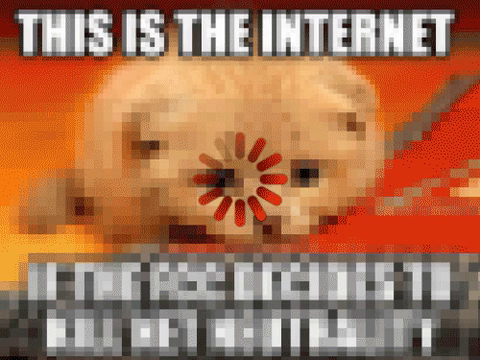

In [5]:

import random

i = random.randint(0, image_count-1)
showarray(vid_obj.get_data(i))

In [ ]:

PIL.Image.fromarray(np.uint8(vid_obj.get_data(i)))

In [ ]:

images_list = []
os.makedirs(name=gif_dir, exist_ok=True)
for i in range(image_count):
    mp4_img = vid_obj.get_data(i)
    images_list.append(mp4_img)
file_path = os.path.join(gif_dir, 'net_neutrality.gif')
imageio.mimsave(file_path, images_list)
print(os.path.abspath(file_path))
Image(file_path)

In [ ]:

images_list = []
os.makedirs(name=gif_dir, exist_ok=True)
for i in range(image_count-1, -1, -1):
    mp4_img = vid_obj.get_data(i)
    images_list.append(mp4_img)
file_path = os.path.join(gif_dir, 'butter.gif')
imageio.mimsave(file_path, images_list)
Image(file_path)